In [5]:
# Add --break-system-packages at the end of the pip install
# for local installs on OS's like Ubuntu
!git clone https://github.com/ucsd-cse150b-f25/notebooks  > /dev/null 2>&1
!mv notebooks/* ./
# After first run, comment the line and rerun

mv: cannot stat 'notebooks/*': No such file or directory


In [6]:
# Run once and restart your session.
# After restart comment the line and rerun
!pip install -r requirements.txt > /dev/null 2>&1
!pip install ipycanvas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 2.6 MB/s eta 0:00:00


In [7]:
# After pip install, run this once, restart your session
# After restart comment the line and rerun
!playwright install chromium > /dev/null 2>&1

# GAMES OR ADVERSARIAL SEARCH

This notebook serves as supporting material for topics covered in **Chapter 5 - Adversarial Search** in the book *Artificial Intelligence: A Modern Approach.* This notebook uses implementations from [games.py](https://github.com/aimacode/aima-python/blob/master/games.py) module. Let's import required classes, methods, global variables etc., from games module.

# CONTENTS

* Game Representation
* Game Examples
    * Tic-Tac-Toe
    * Figure 5.2 Game
* Min-Max
* Alpha-Beta
* Players
* Let's Play Some Games!

In [9]:
from games import *
from notebook import psource, pseudocode
from IPython.display import display, Image
import imgkit

# GAME REPRESENTATION

To represent games we make use of the `Game` class, which we can subclass and override its functions to represent our own games. A helper tool is the namedtuple `GameState`, which in some cases can come in handy, especially when our game needs us to remember a board (like chess).

## `GameState` namedtuple

`GameState` is a [namedtuple](https://docs.python.org/3.5/library/collections.html#collections.namedtuple) which represents the current state of a game. It is used to help represent games whose states can't be easily represented normally, or for games that require memory of a board, like Tic-Tac-Toe.

`Gamestate` is defined as follows:

`GameState = namedtuple('GameState', 'to_move, utility, board, moves')`

* `to_move`: It represents whose turn it is to move next.

* `utility`: It stores the utility of the game state. Storing this utility is a good idea, because, when you do a Minimax Search or an Alphabeta Search, you generate many recursive calls, which travel all the way down to the terminal states. When these recursive calls go back up to the original callee, we have calculated utilities for many game states. We store these utilities in their respective `GameState`s to avoid calculating them all over again.

* `board`: A dict that stores the board of the game.

* `moves`: It stores the list of legal moves possible from the current position.

## `Game` class

Let's have a look at the class `Game` in our module. We see that it has functions, namely `actions`, `result`, `utility`, `terminal_test`, `to_move` and `display`.

We see that these functions have not actually been implemented. This class is just a template class; we are supposed to create the class for our game, by inheriting this `Game` class and implementing all the methods mentioned in `Game`.

In [10]:
%psource Game

Now let's get into details of all the methods in our `Game` class. You have to implement these methods when you create new classes that would represent your game.

* `actions(self, state)`: Given a game state, this method generates all the legal actions possible from this state, as a list or a generator. Returning a generator rather than a list has the advantage that it saves space and you can still operate on it as a list.


* `result(self, state, move)`: Given a game state and a move, this method returns the game state that you get by making that move on this game state.


* `utility(self, state, player)`: Given a terminal game state and a player, this method returns the utility for that player in the given terminal game state. While implementing this method assume that the game state is a terminal game state. The logic in this module is such that this method will be called only on terminal game states.


* `terminal_test(self, state)`: Given a game state, this method should return `True` if this game state is a terminal state, and `False` otherwise.


* `to_move(self, state)`: Given a game state, this method returns the player who is to play next. This information is typically stored in the game state, so all this method does is extract this information and return it.


* `display(self, state)`: This method prints/displays the current state of the game.

# GAME EXAMPLES

Below we give some examples for games you can create and experiment on.

## Tic-Tac-Toe

Take a look at the class `TicTacToe`. All the methods mentioned in the class `Game` have been implemented here.

In [11]:
%psource TicTacToe

The class `TicTacToe` has been inherited from the class `Game`. As mentioned earlier, you really want to do this. Catching bugs and errors becomes a whole lot easier.

Additional methods in TicTacToe:

* `__init__(self, h=3, v=3, k=3)` :  When you create a class inherited from the `Game` class (class `TicTacToe` in our case), you'll have to create an object of this inherited class to initialize the game. This initialization might require some additional information which would be passed to `__init__` as variables. For the case of our `TicTacToe` game, this additional information would be the number of rows `h`, number of columns `v` and how many consecutive X's or O's are needed in a row, column or diagonal for a win `k`. Also, the initial game state has to be defined here in `__init__`.


* `compute_utility(self, board, move, player)` : A method to calculate the utility of TicTacToe game. If 'X' wins with this move, this method returns 1; if 'O' wins return -1; else return 0.


* `k_in_row(self, board, move, player, delta_x_y)` : This method returns `True` if there is a line formed on TicTacToe board with the latest move else `False.`

### TicTacToe GameState

Now, before we start implementing our `TicTacToe` game, we need to decide how we will be representing our game state. Typically, a game state will give you all the current information about the game at any point in time. When you are given a game state, you should be able to tell whose turn it is next, how the game will look like on a real-life board (if it has one) etc. A game state need not include the history of the game. If you can play the game further given a game state, you game state representation is acceptable. While we might like to include all kinds of information in our game state, we wouldn't want to put too much information into it. Modifying this game state to generate a new one would be a real pain then.

Now, as for our `TicTacToe` game state, would storing only the positions of all the X's and O's be sufficient to represent all the game information at that point in time? Well, does it tell us whose turn it is next? Looking at the 'X's and O's on the board and counting them should tell us that. But that would mean extra computing. To avoid this, we will also store whose move it is next in the game state.

Think about what we've done here. We have reduced extra computation by storing additional information in a game state. Now, this information might not be absolutely essential to tell us about the state of the game, but it does save us additional computation time. We'll do more of this later on.

To store game states will will use the `GameState` namedtuple.

* `to_move`: A string of a single character, either 'X' or 'O'.

* `utility`: 1 for win, -1 for loss, 0 otherwise.

* `board`: All the positions of X's and O's on the board.

* `moves`: All the possible moves from the current state. Note here, that storing the moves as a list, as it is done here, increases the space complexity of Minimax Search from `O(m)` to `O(bm)`. Refer to Sec. 5.2.1 of the book.

### Representing a move in TicTacToe game

Now that we have decided how our game state will be represented, it's time to decide how our move will be represented. Becomes easy to use this move to modify a current game state to generate a new one.

For our `TicTacToe` game, we'll just represent a move by a tuple, where the first and the second elements of the tuple will represent the row and column, respectively, where the next move is to be made. Whether to make an 'X' or an 'O' will be decided by the `to_move` in the `GameState` namedtuple.

## Fig52 Game

For a more trivial example we will represent the game in **Figure 5.2** of the book.

<img src="https://github.com/alzhao011/notebooks/blob/main/images/fig_5_2.png?raw=1" width="75%">

The states are represented with capital letters inside the triangles (eg. "A") while moves are the labels on the edges between states (eg. "a1"). Terminal nodes carry utility values. Note that the terminal nodes are named in this example 'B1', 'B2' and 'B2' for the nodes below 'B', and so forth.

We will model the moves, utilities and initial state like this:

In [12]:
moves = dict(A=dict(a1='B', a2='C', a3='D'),
                 B=dict(b1='B1', b2='B2', b3='B3'),
                 C=dict(c1='C1', c2='C2', c3='C3'),
                 D=dict(d1='D1', d2='D2', d3='D3'))
utils = dict(B1=3, B2=12, B3=8, C1=2, C2=4, C3=6, D1=14, D2=5, D3=2)
initial = 'A'

In `moves`, we have a nested dictionary system. The outer's dictionary has keys as the states and values the possible moves from that state (as a dictionary). The inner dictionary of moves has keys the move names and values the next state after the move is complete.

Below is an example that showcases `moves`. We want the next state after move 'a1' from 'A', which is 'B'. A quick glance at the above image confirms that this is indeed the case.

In [13]:
print(moves['A']['a1'])

B


We will now take a look at the functions we need to implement. First we need to create an object of the `Fig52Game` class.

In [14]:
fig52 = Fig52Game()

`actions`: Returns the list of moves one can make from a given state.

In [15]:
psource(Fig52Game.actions)

In [16]:
print(fig52.actions('B'))

['b1', 'b2', 'b3']


`result`: Returns the next state after we make a specific move.

In [17]:
psource(Fig52Game.result)

In [18]:
print(fig52.result('A', 'a1'))

B


`utility`: Returns the value of the terminal state for a player ('MAX' and 'MIN'). Note that for 'MIN' the value returned is the negative of the utility.

In [19]:
psource(Fig52Game.utility)

In [20]:
print(fig52.utility('B1', 'MAX'))
print(fig52.utility('B1', 'MIN'))

3
-3


`terminal_test`: Returns `True` if the given state is a terminal state, `False` otherwise.

In [21]:
psource(Fig52Game.terminal_test)

In [22]:
print(fig52.terminal_test('C3'))

True


`to_move`: Return the player who will move in this state.

In [23]:
psource(Fig52Game.to_move)

In [24]:
print(fig52.to_move('A'))

MAX


As a whole the class `Fig52` that inherits from the class `Game` and overrides its functions:

In [25]:
psource(Fig52Game)

# MIN-MAX

## Overview

This algorithm (often called *Minimax*) computes the next move for a player (MIN or MAX) at their current state. It recursively computes the minimax value of successor states, until it reaches terminals (the leaves of the tree). Using the `utility` value of the terminal states, it computes the values of parent states until it reaches the initial node (the root of the tree).

It is worth noting that the algorithm works in a depth-first manner. The pseudocode can be found below:

In [26]:
pseudocode("Minimax-Decision")

### AIMA3e
__function__ MINIMAX-DECISION(_state_) __returns__ _an action_  
&emsp;__return__ arg max<sub> _a_ &Element; ACTIONS(_s_)</sub> MIN\-VALUE(RESULT(_state_, _a_))  

---
__function__ MAX\-VALUE(_state_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)  
&emsp;_v_ &larr; &minus;&infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MAX(_v_, MIN\-VALUE(RESULT(_state_, _a_)))  
&emsp;__return__ _v_  

---
__function__ MIN\-VALUE(_state_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)  
&emsp;_v_ &larr; &infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MIN(_v_, MAX\-VALUE(RESULT(_state_, _a_)))  
&emsp;__return__ _v_  

---
__Figure__ ?? An algorithm for calculating minimax decisions. It returns the action corresponding to the best possible move, that is, the move that leads to the outcome with the best utility, under the assumption that the opponent plays to minimize utility. The functions MAX\-VALUE and MIN\-VALUE go through the whole game tree, all the way to the leaves, to determine the backed\-up value of a state. The notation argmax <sub>_a_ &Element; _S_</sub> _f_(_a_) computes the element _a_ of set _S_ that has maximum value of _f_(_a_).

---
__function__ EXPECTIMINIMAX(_s_) =     
&emsp;UTILITY(_s_) __if__ TERMINAL\-TEST(_s_)  
&emsp;max<sub>_a_</sub> EXPECTIMINIMAX(RESULT(_s, a_)) __if__ PLAYER(_s_)= MAX  
&emsp;min<sub>_a_</sub> EXPECTIMINIMAX(RESULT(_s, a_)) __if__ PLAYER(_s_)= MIN  
&emsp;∑<sub>_r_</sub> P(_r_) EXPECTIMINIMAX(RESULT(_s, r_)) __if__ PLAYER(_s_)= CHANCE

## Implementation

In the implementation we are using two functions, `max_value` and `min_value` to calculate the best move for MAX and MIN respectively. These functions interact in an alternating recursion; one calls the other until a terminal state is reached. When the recursion halts, we are left with scores for each move. We return the max. Despite returning the max, it will work for MIN too since for MIN the values are their negative (hence the order of values is reversed, so the higher the better for MIN too).

In [27]:
psource(minmax_decision)

## Example

We will now play the Fig52 game using this algorithm. Take a look at the Fig52Game from above to follow along.

It is the turn of MAX to move, and he is at state A. He can move to B, C or D, using moves a1, a2 and a3 respectively. MAX's goal is to maximize the end value. So, to make a decision, MAX needs to know the values at the aforementioned nodes and pick the greatest one. After MAX, it is MIN's turn to play. So MAX wants to know what will the values of B, C and D be after MIN plays.

The problem then becomes what move will MIN make at B, C and D. The successor states of all these nodes are terminal states, so MIN will pick the smallest value for each node. So, for B he will pick 3 (from move b1), for C he will pick 2 (from move c1) and for D he will again pick 2 (from move d3).

Let's see this in code:

In [28]:
print(minmax_decision('B', fig52))
print(minmax_decision('C', fig52))
print(minmax_decision('D', fig52))

b1
c1
d3


Now MAX knows that the values for B, C and D are 3, 2 and 2 (produced by the above moves of MIN). The greatest is 3, which he will get with move a1. This is then the move MAX will make. Let's see the algorithm in full action:

In [29]:
print(minmax_decision('A', fig52))

a1


## Visualization

Below we have a simple game visualization using the algorithm. After you run the command, click on the cell to move the game along. You can input your own values via a list of 27 integers.

In [30]:
from notebook import Canvas_min_max
from random import randint
from IPython.display import display

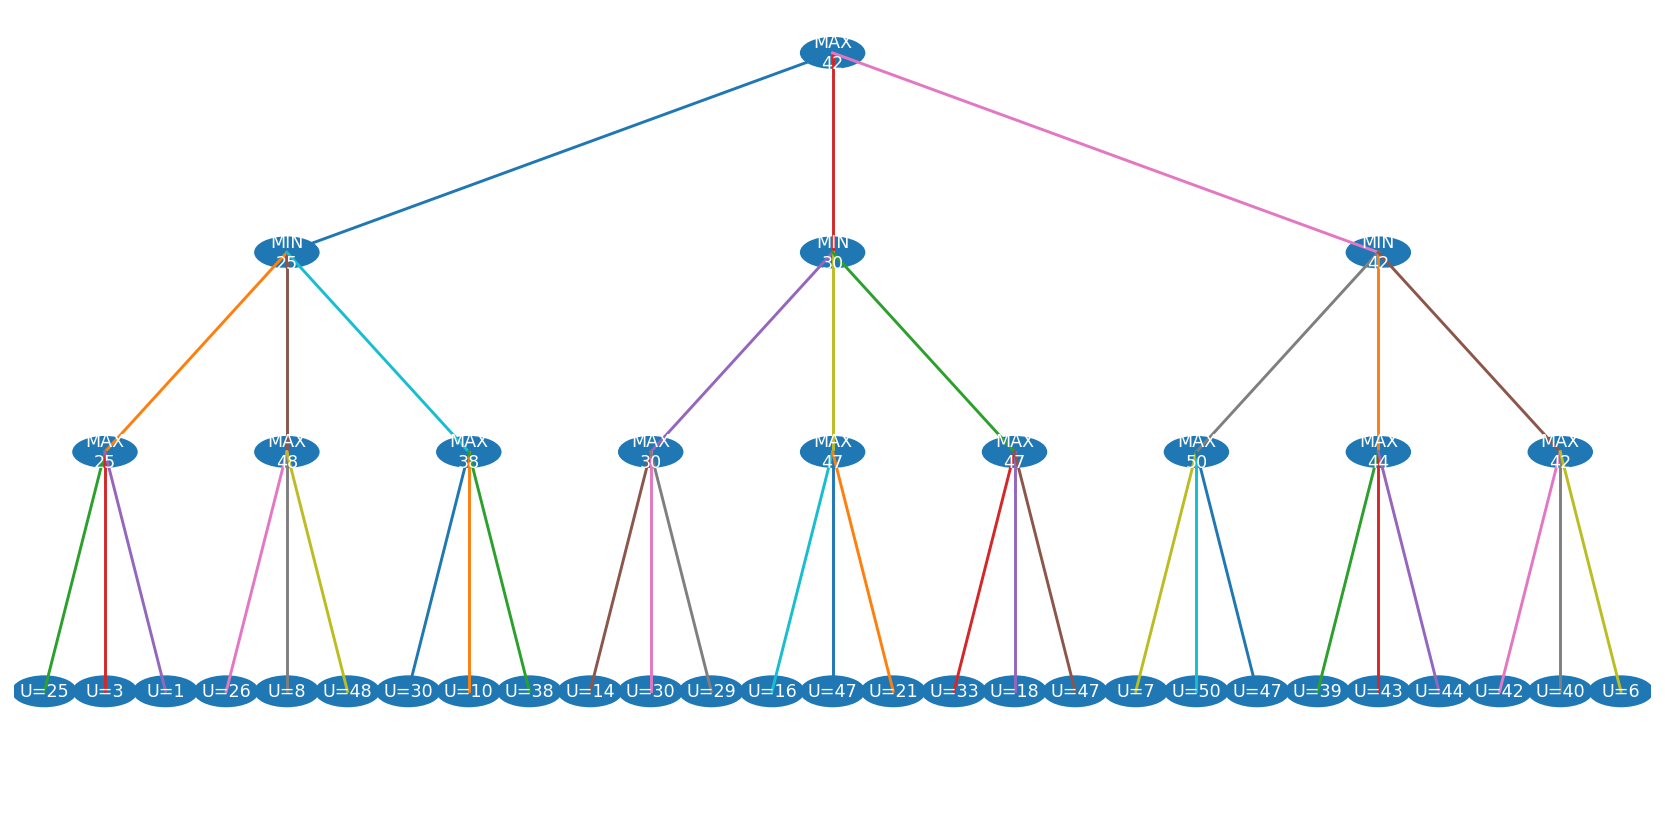

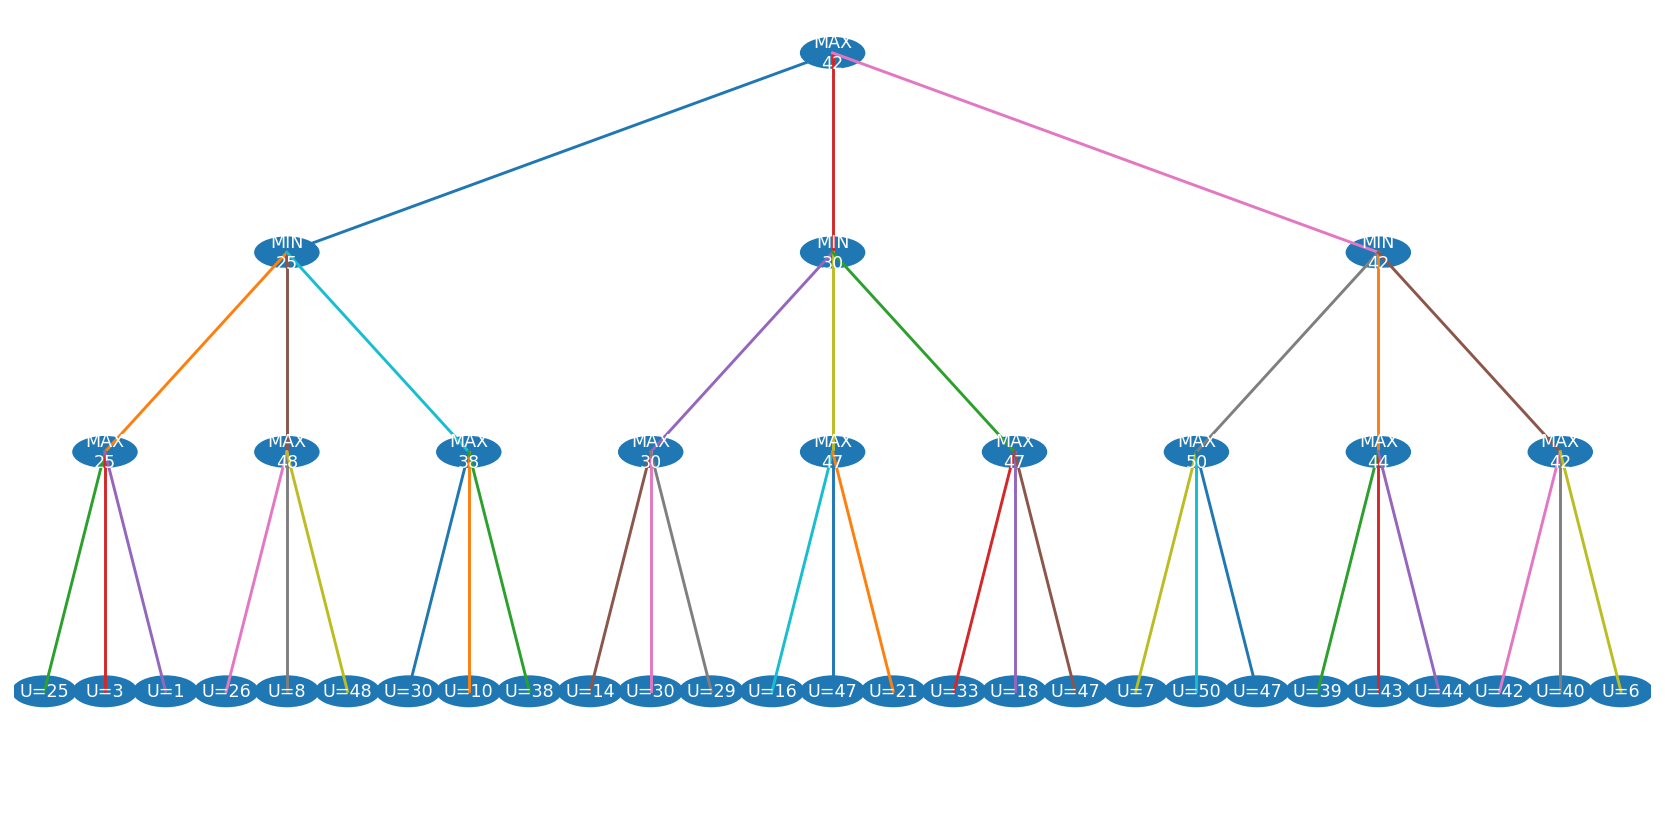

In [31]:
minimax_viz = Canvas_min_max('minimax_viz', [randint(1, 50) for _ in range(27)])
fig = minimax_viz.draw_minimax()
display(fig)

# ALPHA-BETA

## Overview

While *Minimax* is great for computing a move, it can get tricky when the number of game states gets bigger. The algorithm needs to search all the leaves of the tree, which increase exponentially to its depth.

For Tic-Tac-Toe, where the depth of the tree is 9 (after the 9th move, the game ends), we can have at most 9! terminal states (at most because not all terminal nodes are at the last level of the tree; some are higher up because the game ended before the 9th move). This isn't so bad, but for more complex problems like chess, we have over $10^{40}$ terminal nodes. Unfortunately we have not found a way to cut the exponent away, but we nevertheless have found ways to alleviate the workload.

Here we examine *pruning* the game tree, which means removing parts of it that we do not need to examine. The particular type of pruning is called *alpha-beta*, and the search in whole is called *alpha-beta search*.

To showcase what parts of the tree we don't need to search, we will take a look at the example `Fig52Game`.

In the example game, we need to find the best move for player MAX at state A, which is the maximum value of MIN's possible moves at successor states.

`MAX(A) = MAX( MIN(B), MIN(C), MIN(D) )`

`MIN(B)` is the minimum of 3, 12, 8 which is 3. So the above formula becomes:

`MAX(A) = MAX( 3, MIN(C), MIN(D) )`

Next move we will check is c1, which leads to a terminal state with utility of 2. Before we continue searching under state C, let's pop back into our formula with the new value:

`MAX(A) = MAX( 3, MIN(2, c2, .... cN), MIN(D) )`

We do not know how many moves state C allows, but we know that the first one results in a value of 2. Do we need to keep searching under C? The answer is no. The value MIN will pick on C will at most be 2. Since MAX already has the option to pick something greater than that, 3 from B, he does not need to keep searching under C.

In *alpha-beta* we make use of two additional parameters for each state/node, *a* and *b*, that describe bounds on the possible moves. The parameter *a* denotes the best choice (highest value) for MAX along that path, while *b* denotes the best choice (lowest value) for MIN. As we go along we update *a* and *b* and prune a node branch when the value of the node is worse than the value of *a* and *b* for MAX and MIN respectively.

In the above example, after the search under state B, MAX had an *a* value of 3. So, when searching node C we found a value less than that, 2, we stopped searching under C.

You can read the pseudocode below:

In [32]:
pseudocode("Alpha-Beta-Search")

### AIMA3e
__function__ ALPHA-BETA-SEARCH(_state_) __returns__ an action  
&emsp;_v_ &larr; MAX\-VALUE(_state_, &minus;&infin;, &plus;&infin;)  
&emsp;__return__ the _action_ in ACTIONS(_state_) with value _v_  

---
__function__ MAX\-VALUE(_state_, _&alpha;_, _&beta;_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)  
&emsp;_v_ &larr; &minus;&infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MAX(_v_, MIN\-VALUE(RESULT(_state_, _a_), _&alpha;_, _&beta;_))  
&emsp;&emsp;&emsp;__if__ _v_ &ge; _&beta;_ __then return__ _v_  
&emsp;&emsp;&emsp;_&alpha;_ &larr; MAX(_&alpha;_, _v_)  
&emsp;__return__ _v_  

---
__function__ MIN\-VALUE(_state_, _&alpha;_, _&beta;_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)  
&emsp;_v_ &larr; &plus;&infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MIN(_v_, MAX\-VALUE(RESULT(_state_, _a_), _&alpha;_, _&beta;_))  
&emsp;&emsp;&emsp;__if__ _v_ &le; _&alpha;_ __then return__ _v_  
&emsp;&emsp;&emsp;_&beta;_ &larr; MIN(_&beta;_, _v_)  
&emsp;__return__ _v_  


---
__Figure__ ?? The alpha\-beta search algorithm. Notice that these routines are the same as the MINIMAX functions in Figure ??, except for the two lines in each of MIN\-VALUE and MAX\-VALUE that maintain _&alpha;_ and _&beta;_ (and the bookkeeping to pass these parameters along).

## Implementation

Like *minimax*, we again make use of functions `max_value` and `min_value`, but this time we utilise the *a* and *b* values, updating them and stopping the recursive call if we end up on nodes with values worse than *a* and *b* (for MAX and MIN). The algorithm finds the maximum value and returns the move that results in it.

The implementation:

In [33]:
%psource alpha_beta_search

## Example

We will play the Fig52 Game with the *alpha-beta* search algorithm. It is the turn of MAX to play at state A.

In [34]:
print(alpha_beta_search('A', fig52))

a1


The optimal move for MAX is a1, for the reasons given above. MIN will pick move b1 for B resulting in a value of 3, updating the *a* value of MAX to 3. Then, when we find under C a node of value 2, we will stop searching under that sub-tree since it is less than *a*. From D we have a value of 2. So, the best move for MAX is the one resulting in a value of 3, which is a1.

Below we see the best moves for MIN starting from B, C and D respectively. Note that the algorithm in these cases works the same way as *minimax*, since all the nodes below the aforementioned states are terminal.

In [35]:
print(alpha_beta_search('B', fig52))
print(alpha_beta_search('C', fig52))
print(alpha_beta_search('D', fig52))

b1
c1
d3


## Visualization

Below you will find the visualization of the alpha-beta algorithm for a simple game. Click on the cell after you run the command to move the game along. You can input your own values via a list of 27 integers.

In [36]:
from notebook import Canvas_alpha_beta
from random import randint
from IPython.display import display

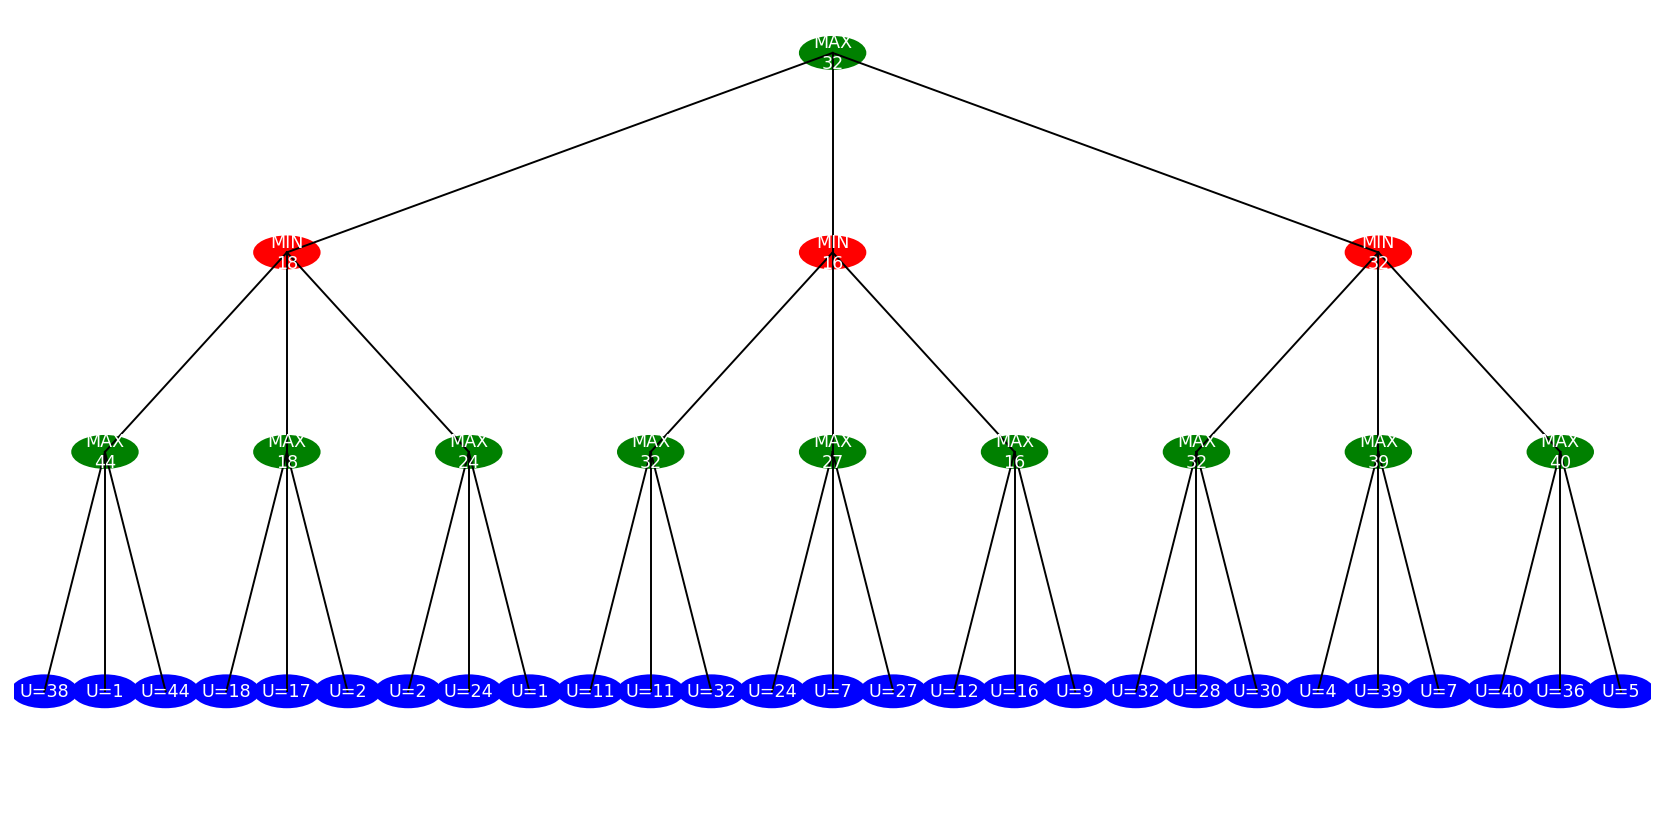

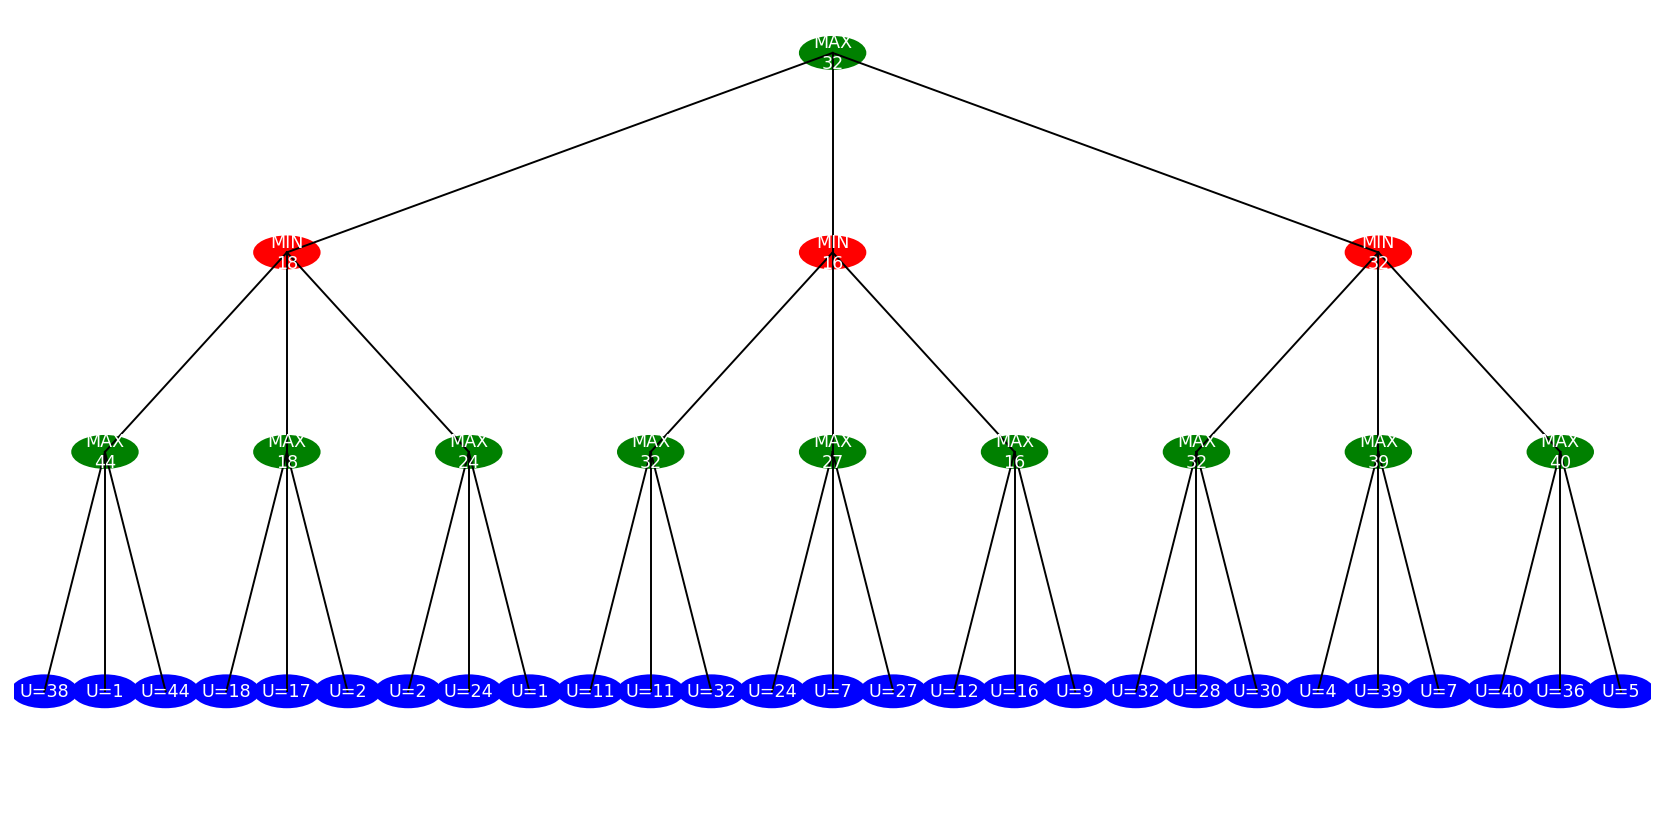

In [37]:
alphabeta_viz = Canvas_alpha_beta('alphabeta_viz', [randint(1, 50) for i in range(27)])
fig = alphabeta_viz.draw_alphabeta()
display(fig)

# PLAYERS

So, we have finished the implementation of the `TicTacToe` and `Fig52Game` classes. What these classes do is defining the rules of the games. We need more to create an AI that can actually play games. This is where `random_player` and `alphabeta_player` come in.

## query_player
The `query_player` function allows you, a human opponent, to play the game. This function requires a `display` method to be implemented in your game class, so that successive game states can be displayed on the terminal, making it easier for you to visualize the game and play accordingly.

## random_player
The `random_player` is a function that plays random moves in the game. That's it. There isn't much more to this guy.

## alphabeta_player
The `alphabeta_player`, on the other hand, calls the `alphabeta_search` function, which returns the best move in the current game state. Thus, the `alphabeta_player` always plays the best move given a game state, assuming that the game tree is small enough to search entirely.

## minimax_player
The `minimax_player`, on the other hand calls the `minimax_search` function which returns the best move in the current game state.

## play_game
The `play_game` function will be the one that will actually be used to play the game. You pass as arguments to it an instance of the game you want to play and the players you want in this game. Use it to play AI vs AI, AI vs human, or even human vs human matches!

# LET'S PLAY SOME GAMES!

## Game52

Let's start by experimenting with the `Fig52Game` first. For that we'll create an instance of the subclass Fig52Game inherited from the class Game:

In [38]:
game52 = Fig52Game()

First we try out our `random_player(game, state)`. Given a game state it will give us a random move every time:

In [39]:
print(random_player(game52, 'A'))
print(random_player(game52, 'A'))

a1
a1


The `alphabeta_player(game, state)` will always give us the best move possible, for the relevant player (MAX or MIN):

In [40]:
print( alphabeta_player(game52, 'A') )
print( alphabeta_player(game52, 'B') )
print( alphabeta_player(game52, 'C') )

a1
b1
c1


What the `alphabeta_player` does is, it simply calls the method `alphabeta_full_search`. They both are essentially the same. In the module, both `alphabeta_full_search` and `minimax_decision` have been implemented. They both do the same job and return the same thing, which is, the best move in the current state. It's just that `alphabeta_full_search` is more efficient with regards to time because it prunes the search tree and hence, explores lesser number of states.

In [41]:
minmax_decision('A', game52)

'a1'

In [42]:
alpha_beta_search('A', game52)

'a1'

Demonstrating the play_game function on the game52:

In [43]:
game52.play_game(alphabeta_player, alphabeta_player)

B1


3

In [44]:
game52.play_game(alphabeta_player, random_player)

B2


12

In [45]:
game52.play_game(query_player, alphabeta_player)

current state:
A
available moves: ['a1', 'a2', 'a3']

Your move? a1
B1


3

In [46]:
game52.play_game(alphabeta_player, query_player)

current state:
B
available moves: ['b1', 'b2', 'b3']

Your move? b1
B1


3

Note that if you are the first player then alphabeta_player plays as MIN, and if you are the second player then alphabeta_player plays as MAX. This happens because that's the way the game is defined in the class Fig52Game. Having a look at the code of this class should make it clear.

## TicTacToe

Now let's play `TicTacToe`. First we initialize the game by creating an instance of the subclass TicTacToe inherited from the class Game:

In [47]:
ttt = TicTacToe()

We can print a state using the display method:

In [48]:
ttt.display(ttt.initial)

. . . 
. . . 
. . . 


Hmm, so that's the initial state of the game; no X's and no O's.

Let us create a new game state by ourselves to experiment:

In [49]:
my_state = GameState(
    to_move = 'X',
    utility = '0',
    board = {(1,1): 'X', (1,2): 'O', (1,3): 'X',
             (2,1): 'O',             (2,3): 'O',
             (3,1): 'X',
            },
    moves = [(2,2), (3,2), (3,3)]
    )

So, how does this game state look like?

In [50]:
ttt.display(my_state)

X O X 
O . O 
X . . 


The `random_player` will behave how he is supposed to i.e. *pseudo-randomly*:

In [51]:
random_player(ttt, my_state)

(2, 2)

In [52]:
random_player(ttt, my_state)

(2, 2)

But the `alphabeta_player` will always give the best move, as expected:

In [53]:
alphabeta_player(ttt, my_state)

(2, 2)

Now let's make two players play against each other. We use the `play_game` function for this. The `play_game` function makes players play the match against each other and returns the utility for the first player, of the terminal state reached when the game ends. Hence, for our `TicTacToe` game, if we get the output +1, the first player wins, -1 if the second player wins, and 0 if the match ends in a draw.

In [54]:
ttt.play_game(random_player, alphabeta_player)

. O X 
. O . 
X O X 


-1

The output is (usually) -1, because `random_player` loses to `alphabeta_player`. Sometimes, however, `random_player` manages to draw with `alphabeta_player`.

Since an `alphabeta_player` plays perfectly, a match between two `alphabeta_player`s should always end in a draw. Let's see if this happens:

In [55]:
for _ in range(10):
    print(ttt.play_game(alphabeta_player, alphabeta_player))

X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0
X X O 
O O X 
X O X 
0


A `random_player` should never win against an `alphabeta_player`. Let's test that.

In [56]:
for _ in range(10):
    print(ttt.play_game(random_player, alphabeta_player))

X O O 
. O X 
X O X 
-1
O X O 
. O X 
X X O 
-1
O . X 
O X X 
O . . 
-1
X X O 
O O X 
O . X 
-1
O X O 
X O X 
O . X 
-1
O O O 
X X O 
. X X 
-1
O X X 
X O O 
X O X 
0
O X O 
X O X 
X O X 
0
. O . 
X O . 
X O X 
-1
O X X 
X O . 
. . O 
-1


## Canvas_TicTacToe(Canvas)

This subclass is used to play TicTacToe game interactively in Jupyter notebooks. TicTacToe class is called while initializing this subclass.

Let's have a match between `random_player` and `alphabeta_player`. Click on the board to call players to make a move.

In [57]:
from notebook import Canvas_TicTacToe

Let's start by playing a game ourselves against another human player. Click on the board to make moves:

In [61]:
print('You must click the figure for where you want your moves to execute!')
human_play = Canvas_TicTacToe('human_play', 'human', 'human')

You must click the figure for where you want your moves to execute!


Canvas(height=350, width=300)

Now let's watch two AI players battle it out. We'll have a `random_player` compete against an `alpha_beta_player`. Click on the board to advance the game:

In [62]:
print('You must click the figure for the moves to execute!')
bot_play = Canvas_TicTacToe('bot_play', 'random', 'alpha_beta')

You must click the figure for the moves to execute!


Canvas(height=350, width=300)

Now, let's play a game ourselves against a `random_player`:

In [63]:
print('You must click the figure for where you want your moves to execute!')
rand_play = Canvas_TicTacToe('rand_play', 'human', 'random')

You must click the figure for where you want your moves to execute!


Canvas(height=350, width=300)

In [60]:
from google.colab import output
output.enable_custom_widget_manager()

Yay! We (usually) win. But we cannot win against an `alphabeta_player`, however hard we try.

In [64]:
print('You must click the figure for where you want your moves to execute!')
ab_play = Canvas_TicTacToe('ab_play', 'human', 'alpha_beta')

You must click the figure for where you want your moves to execute!


Canvas(height=350, width=300)

In [65]:
print('You must click the figure for the moves to execute!')
ab_bot_play = Canvas_TicTacToe('ab_play', 'random', 'alpha_beta')

You must click the figure for the moves to execute!


Canvas(height=350, width=300)

In [66]:
# Download your notebook, and upload it as agents.ipynb
# Run the code below and download the agents.html file
!jupyter nbconvert --to webpdf games.ipynb

[NbConvertApp] Converting notebook games.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/exporters/webpdf.py", line 94, in main
    browser = await chromium.launch(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/playwright/async_api/_generated.py", line 14495, in launch
    await self._impl_obj.launch(
  File "/usr/local/lib/python3.12/dist-packages/playwright/_impl/_browser_type.py", line 98, in launch
    await self._channel.send(
  File "/usr/local/lib/python3.12/dist-packages/playwright/_impl/_connection.py", line 69, in send
    return await self._connection.wrap_api_call(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/playwright/_impl/_connection.py", line 559, in wrap_api_call
    raise rewrite_error(error, f"{parsed_st['apiName']}: {erro